In [1]:
import glob
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
A_100K_dir = '/blue/adamginsburg/abulatek/brick/dasar/henkel_methanol_A_100K/'
A_100K_files = glob.glob(f'{A_100K_dir}/*')

A_40K_dir = '/blue/adamginsburg/abulatek/brick/dasar/henkel_methanol_A_40K/'
A_40K_files = glob.glob(f'{A_40K_dir}/*')

E_100K_dir = '/blue/adamginsburg/abulatek/brick/dasar/henkel_methanol_E_100K/'
E_100K_files = glob.glob(f'{E_100K_dir}/*')

E_40K_dir = '/blue/adamginsburg/abulatek/brick/dasar/henkel_methanol_E_40K/'
E_40K_files = glob.glob(f'{E_40K_dir}/*')

In [3]:
def nonblank_lines(f):
    for l in f:
        line = l.rstrip()
        if line:
            yield line

### Plot excitation temperature versus density and column density for the dasar line at 100 K

In [4]:
tbl_rows = []

temp_K = 100
for fn in A_100K_files:
    # Access physical parameters
    with open(fn) as f:
        i = 0
        for line in nonblank_lines(f):
            if i == 0:
                i += 1
                continue
            elif i == 1:
                params = line
                i += 1
            else:
                break
    dens = float(params.split('n(H_2)=')[1].split('(cm-3)')[0])
    # print(f'{dens:.0e}')
    coldens = float(params.split('N(CH3OH)=')[1].split('(cm-2)')[0])
    # print(f'{coldens:.0e}')
    
    # Access data
    data = ascii.read(fn, data_start = 4, header_start = 3, names = ['Ji', 'Ki', 'Vi', 'Jf', 'Kf', 'Vf', 'freq (GHz)', 'Tex(K)', 'tau', 'Tb(K)']) 
    dasar_ln = np.argmax((data['Ji'] == 3) & (data['Ki'] == 1) & (data['Jf'] == 4) & (data['Kf'] == 0))
    tex = data[dasar_ln]['Tex(K)']
    tau = data[dasar_ln]['tau']
    tb = data[dasar_ln]['Tb(K)']
    
    tbl_rows.append([dens, coldens, tex, tau, tb])
tbl = Table(rows=tbl_rows, names=('dens', 'coldens', 'tex', 'tau', 'tb'))

In [5]:
# This is not a great way to do this
tbl_NH2_5e13 = tbl.group_by('coldens').groups[0]
tbl_NH2_1e14 = tbl.group_by('coldens').groups[1]
tbl_NH2_3e14 = tbl.group_by('coldens').groups[2]
tbl_NH2_1e15 = tbl.group_by('coldens').groups[3]
tbl_NH2_3e15 = tbl.group_by('coldens').groups[4]
tbl_NH2_1e16 = tbl.group_by('coldens').groups[5]

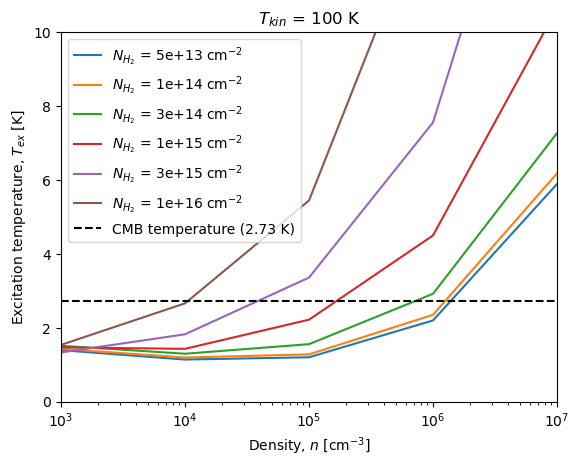

In [11]:
plt.figure()
for tbl in [tbl_NH2_5e13, tbl_NH2_1e14, tbl_NH2_3e14, tbl_NH2_1e15, tbl_NH2_3e15, tbl_NH2_1e16]:
    tbl.sort('dens')
    coldens_temp = tbl['coldens'][0]
    plt.semilogx(tbl['dens'], tbl['tex'], # color = 'tab:blue', 
                 label = f'$N_{{H_2}}$ = {coldens_temp:.0e} cm$^{{-2}}$')
plt.axhline(2.73, color = 'k', linestyle = '--', label = "CMB temperature (2.73 K)")
plt.xlabel("Density, $n$ [cm$^{-3}$]")
plt.ylabel("Excitation temperature, $T_{ex}$ [K]")
plt.xlim(min(tbl['dens']), max(tbl['dens']))
plt.ylim(0, 10)
plt.title(f'$T_{{kin}}$ = {temp_K} K')
plt.legend()
plt.savefig('632e0742965a6e88270d73d7/figures/christian_data_Tex_vs_density_Tk_100K.pdf')
plt.savefig('632e0742965a6e88270d73d7/figures/christian_data_Tex_vs_density_Tk_100K.png', dpi = 200)
plt.show()

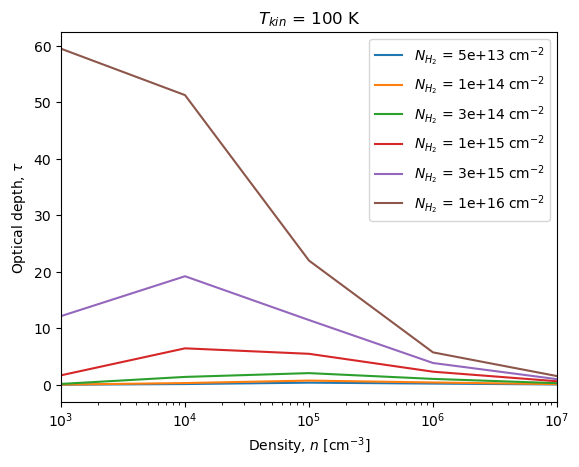

In [12]:
plt.figure()
for tbl in [tbl_NH2_5e13, tbl_NH2_1e14, tbl_NH2_3e14, tbl_NH2_1e15, tbl_NH2_3e15, tbl_NH2_1e16]:
    tbl.sort('dens')
    coldens_temp = tbl['coldens'][0]
    plt.semilogx(tbl['dens'], tbl['tau'], # color = 'tab:cyan'
                 label = f'$N_{{H_2}}$ = {coldens_temp:.0e} cm$^{{-2}}$')
plt.xlabel("Density, $n$ [cm$^{-3}$]")
plt.ylabel(r"Optical depth, $\tau$")
plt.xlim(min(tbl['dens']), max(tbl['dens']))
plt.title(f'$T_{{kin}}$ = {temp_K} K')
plt.legend()
plt.savefig('632e0742965a6e88270d73d7/figures/christian_data_tau_vs_density_Tk_100K.pdf')
plt.savefig('632e0742965a6e88270d73d7/figures/christian_data_tau_vs_density_Tk_100K.png', dpi = 200)
plt.show()

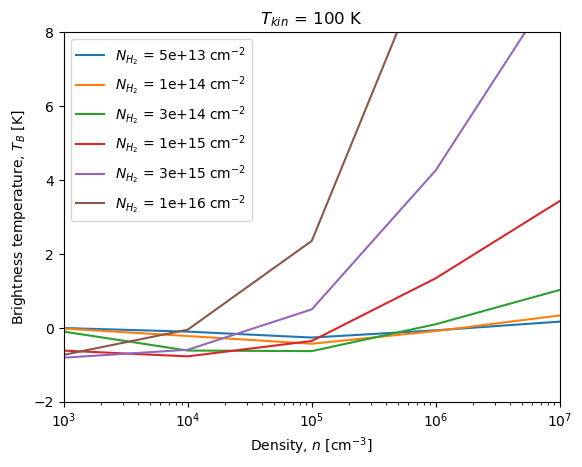

In [14]:
plt.figure()
for tbl in [tbl_NH2_5e13, tbl_NH2_1e14, tbl_NH2_3e14, tbl_NH2_1e15, tbl_NH2_3e15, tbl_NH2_1e16]:
    tbl.sort('dens')
    coldens_temp = tbl['coldens'][0]
    plt.semilogx(tbl['dens'], tbl['tb'], # color = 'tab:blue', 
                 label = f'$N_{{H_2}}$ = {coldens_temp:.0e} cm$^{{-2}}$')
plt.xlabel("Density, $n$ [cm$^{-3}$]")
plt.ylabel("Brightness temperature, $T_B$ [K]")
plt.xlim(min(tbl['dens']), max(tbl['dens']))
plt.ylim(-2, 8)
plt.title(f'$T_{{kin}}$ = {temp_K} K')
plt.legend()
plt.savefig('632e0742965a6e88270d73d7/figures/christian_data_TB_vs_density_Tk_100K.pdf')
plt.savefig('632e0742965a6e88270d73d7/figures/christian_data_TB_vs_density_Tk_100K.png', dpi = 200)
plt.show()

### Plot excitation temperature versus density and column density for the dasar line at 40 K

In [9]:
# Repeat all above, but for A_40K_files